<a href="https://colab.research.google.com/github/coderlakshayjain/ds-ml-playground/blob/main/KNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN Classification Accuracy: 1.00


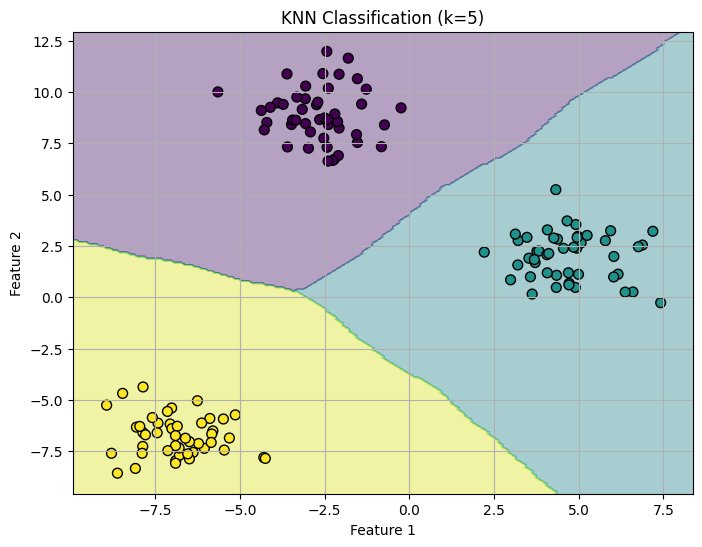

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Create a toy dataset
X, y = make_blobs(n_samples=200, centers=3, cluster_std=1.2, random_state=42)

# 2. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# 4. Train the model (stores the training data)
knn.fit(X_train, y_train)

# 5. Predict on test data
y_pred = knn.predict(X_test)

# 6. Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Classification Accuracy: {accuracy:.2f}")

# 7. Plotting decision boundaries
def plot_knn_decision_boundary(X, y, model, k=5):
    h = 0.1  # step size in the mesh

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(f"KNN Classification (k={k})")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

# 8. Plot decision boundary on training data
plot_knn_decision_boundary(X_train, y_train, knn, k=5)